<!-- Warning, README.md is autogenerated from README.ipynb, do not edit it directly -->

`pip install make_agents`

[![](https://github.com/sradc/make_agents/workflows/Python%20package/badge.svg?branch=main)](https://github.com/sradc/make_agents/commits/)

<p align="center">
  <img src="README_files/make_agents_logo.jpg" width=256>
</p>

# MakeAgents

MakeAgents is a micro framework for creating LLM-driven agents, (it currently supports OpenAI's GPT chat models).

The MakeAgents paradigm is to define an agent's behaviour and capabilities through **action functions**, and an **action graph**. 

TODO: put this in a "concepts" tutorial, with examples for each:

- Action functions: capabilities of the agent, that also shape its behaviour, (can be considered as part of the prompt).
- Action graph: defines what actions the agent has access to at a given point in time. Can shape the behaviour, and e.g. make sure that certain actions have been carried out before other actions.
- Message stack: put your system prompt here. This is the conversation history, although if it's summarised / reduced, it no longer reflects history.
- Execution is carried out using a generator, which makes it easy to see and vet what the agent is doing / about to do.


## Quickstart examples

### Example 1: A conversational agent for getting the user's name

In [1]:
import json
import pprint

import make_agents as ma

from pydantic import BaseModel, Field

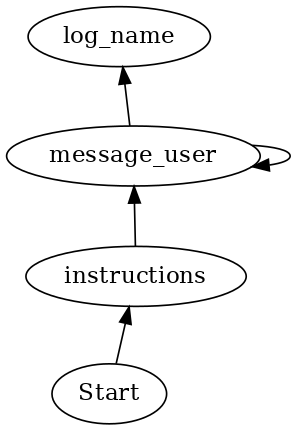

{ 'content': None,
  'function_call': { 'arguments': '{"next_function": "instructions"}',
                     'name': 'select_next_func'},
  'role': 'assistant'}

{ 'content': '{"next_function": "instructions"}',
  'name': 'select_next_func',
  'role': 'function'}



InvalidRequestError: None is not of type 'string' - 'functions.0.description'

In [3]:
# Define action functions


@ma.action
def instructions():
    return "Your task is to get the user's first and second name."


class MessageUserArg(BaseModel):
    question: str = Field(description="Question to ask user")


@ma.action
def message_user(arg: MessageUserArg):
    """Send the user a message, and get their response."""
    response = ""
    while response == "":
        response = input(arg.question).strip()
    return response


class LogNameArg(BaseModel):
    first_name: str = Field(description="User's first name")
    last_name: str = Field(description="User's last name")


@ma.action
def log_name(arg: LogNameArg):
    """Log the name of the user. Only do this when you are certain you've got the name."""
    return {"first_name": arg.first_name, "last_name": arg.last_name}


# Define action graph
action_graph = {
    ma.Start: [instructions],
    instructions: [message_user],
    message_user: [message_user, log_name],
}
display(ma.bonus.draw_graph(action_graph))

# Run the agent
for messages in ma.run_agent(action_graph):
    # `messages` contains the whole message stack, so just print the most recent message
    pprint.pprint(messages[-1], indent=2)
    print()
print(f"Retrieved user_name: {json.loads(messages[-1]['content'])}")

### Notes:

Prompting has a big impact on the performance of the agent. The `llm_func` function names, Pydantic models and docstrings can all be considered part of the prompt.

### Contributing

It's early days for the framework...

- If you have an opinion, please raise an issue / start a discussion.
- If you have created something cool, please consider contributing (will put in `community_examples`)

### Dev setup

- Clone the repo and `cd` into it
- Run `poetry install`
- Run `poetry run pre-commit install`
